In [ ]:
!nvidia-smi

Wed Feb 15 17:18:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0    49W / 400W |   7020MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import praw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
reddit = praw.Reddit(client_id='ve7QTSa-FD7bn9rlIr6UTQ', client_secret='yAjGgu92BBbB-WWIIqPre9UxAk0-CA', user_agent='test scraper app')


# GameStop                                                                 

In [ ]:
#need to use different API
game_stop = reddit.subreddit('GameStop').hot


In [ ]:
posts = []
gs_subr = reddit.subreddit('GameStop').hot(limit=500)
for post in gs_subr:
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
gs = pd.DataFrame(posts, columns=['title', 'score','id','subreddit','url','num_comments', 'body', 'created'])
print(gs)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

                                                 title  score       id  \
0    Weekly Customer Question Megathread ***READ BE...      5  1107k66   
1       [Mod Leak] Plans for a better Fiscal Year 2023    195  10s8ch7   
2    Are there any managers/employees who actually ...     33  1130dk0   
3       Thanks for picking Morgan Stanley corporate...     10  112zwlt   
4                                          Q4 bonuses?      3  112zf9k   
..                                                 ...    ...      ...   
495                                         Tiny TV’s?      9   zxo055   
496                                      just quit 💫💫💫    205   zww1u0   
497  i want to get a job at gamestop, what would be...      6   zxjjgu   
498                                  SL Pay Discussion     14   zxavzc   
499  If you have the inability to read and comprehe...     53   zwx6io   

    subreddit                                                url  \
0    GameStop  https://www.reddit.com/r/Gam

In [ ]:
gs.isnull().sum()

title           0
score           0
id              0
subreddit       0
url             0
num_comments    0
body            0
created         0
dtype: int64

In [ ]:
# game_stop = reddit.subreddit('teslainvestorsclub').hot(limit=500)
# for post in game_stop:
#     print(post.title)

In [ ]:
# posts_1 = []
# tic_subr = reddit.subreddit('teslainvestorsclub').hot()
# for post in tic_subr:
#     posts_1.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
# tic = pd.DataFrame(posts_1, columns=['title', 'score','id','subreddit','url','num_comments', 'body', 'created'])
# print(tic)


In [ ]:
# tic.isnull().sum()

histogram length of each title, include sentiment column, word cloud, how to feed the data into bert

There may be other models, the model will be the same it's amatter of which packate has it

TOML


In [ ]:
gs['title']

0      Weekly Customer Question Megathread ***READ BE...
1         [Mod Leak] Plans for a better Fiscal Year 2023
2      Are there any managers/employees who actually ...
3         Thanks for picking Morgan Stanley corporate...
4                                            Q4 bonuses?
                             ...                        
495                                           Tiny TV’s?
496                                        just quit 💫💫💫
497    i want to get a job at gamestop, what would be...
498                                    SL Pay Discussion
499    If you have the inability to read and comprehe...
Name: title, Length: 500, dtype: object

In [ ]:
gs['text_length'] = gs['title'].apply(len)

In [ ]:
gs.head()

,title,score,id,subreddit,url,num_comments,body,created,text_length
0,Weekly Customer Question Megathread ***READ BE...,5,1107k66,GameStop,https://www.reddit.com/r/GameStop/comments/110...,117,[Come join us in the (unofficial) GameStop Di...,1.676178e+09,61
1,[Mod Leak] Plans for a better Fiscal Year 2023,195,10s8ch7,GameStop,https://i.redd.it/4a7l8xgdsvfa1.png,112,,1.675391e+09,46
2,Are there any managers/employees who actually ...,33,1130dk0,GameStop,https://i.redd.it/okmmiq1sueia1.jpg,14,,1.676474e+09,194
3,Thanks for picking Morgan Stanley corporate...,10,112zwlt,GameStop,https://www.reddit.com/r/GameStop/comments/112...,30,...cause I'm logged into my account right now....,1.676473e+09,46
4,Q4 bonuses?,3,112zf9k,GameStop,https://www.reddit.com/r/GameStop/comments/112...,7,Anyone know when we’re supposed to get them? 🥴,1.676472e+09,11


In [ ]:
a = gs['text_length']

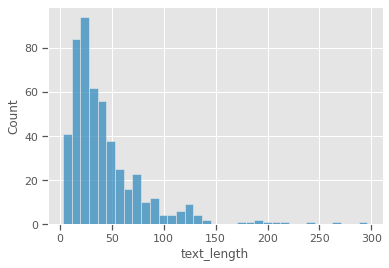

In [ ]:
sns.histplot(data=gs, x = 'text_length')

In [ ]:
def dataclean(s):
  stopset = set(stopwords.words('english'))
  tokens = nltk.word_tokenize(s)
  cleanup = " ".join(filter(lambda word: word not in stopset, s.split()))
  return cleanup

In [ ]:
gs['text'] = gs['title'].astype(str).str.lower()

In [ ]:
regexp = RegexpTokenizer('\w+')

gs['text_token'] = gs['text'].apply(regexp.tokenize)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
#stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
#new_stopwords = ["megathread", "Megathread", "daily", "2022", "thread", "Thread", "Daily"]

In [ ]:
#stpwrd = nltk.corpus.stopwords.words('english')
#stpwrd.extend(new_stopwords)

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['megathread', 'Megathread', 'daily', '2022', 'thread', 'Thread', 'Daily']
stopwords.extend(newStopWords)

In [ ]:
gs['text_token'] = gs['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
gs.head()

,title,score,id,subreddit,url,num_comments,body,created,text_length,text,text_token
0,Weekly Customer Question Megathread ***READ BE...,5,1107k66,GameStop,https://www.reddit.com/r/GameStop/comments/110...,117,[Come join us in the (unofficial) GameStop Di...,1.676178e+09,61,weekly customer question megathread ***read be...,"[weekly, customer, question, read, posting]"
1,[Mod Leak] Plans for a better Fiscal Year 2023,195,10s8ch7,GameStop,https://i.redd.it/4a7l8xgdsvfa1.png,112,,1.675391e+09,46,[mod leak] plans for a better fiscal year 2023,"[mod, leak, plans, better, fiscal, year, 2023]"
2,Are there any managers/employees who actually ...,33,1130dk0,GameStop,https://i.redd.it/okmmiq1sueia1.jpg,14,,1.676474e+09,194,are there any managers/employees who actually ...,"[managers, employees, actually, enjoy, working..."
3,Thanks for picking Morgan Stanley corporate...,10,112zwlt,GameStop,https://www.reddit.com/r/GameStop/comments/112...,30,...cause I'm logged into my account right now....,1.676473e+09,46,thanks for picking morgan stanley corporate...,"[thanks, picking, morgan, stanley, corporate]"
4,Q4 bonuses?,3,112zf9k,GameStop,https://www.reddit.com/r/GameStop/comments/112...,7,Anyone know when we’re supposed to get them? 🥴,1.676472e+09,11,q4 bonuses?,"[q4, bonuses]"


In [ ]:
gs['text_string'] = gs['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>1]))

In [ ]:
all_words = ' '.join([word for word in gs['text_string']])

In [ ]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [ ]:
from nltk.probability import FreqDist

In [ ]:
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'gamestop': 44, 'store': 33, 'customer': 25, 'guest': 24, 'today': 19, 'promoted': 18, 'new': 16, 'get': 15, 'anyone': 15, 'sl': 15, ...})

In [ ]:
gs['text_string_fdist'] = gs['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1]))

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer


In [ ]:
wordnet_lem= WordNetLemmatizer()

In [ ]:
gs['text_string_lem'] = gs['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [ ]:
gs['is_equal'] = (gs['text_string_fdist']== gs['text_string_lem'])

In [ ]:
gs.is_equal.value_counts()

True     494
False      6
Name: is_equal, dtype: int64

In [ ]:
all_words_lem = ' '.join([word for word in gs['text_string_lem']])

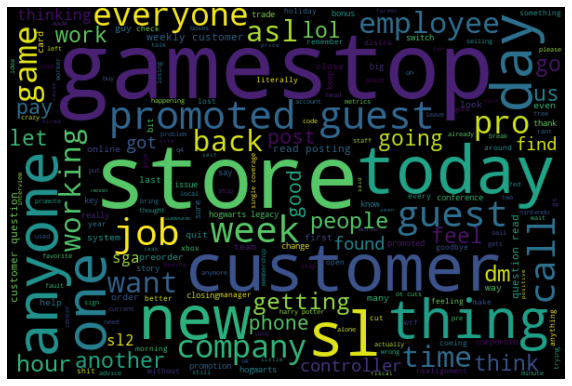

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [ ]:
top_10 = fd.most_common(10)
fdist = pd.Series(dict(top_10))

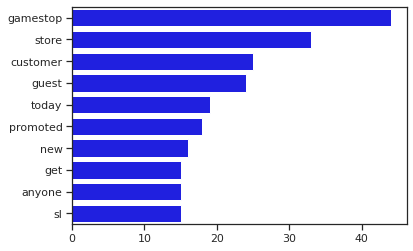

In [ ]:
sns.set_theme(style = "ticks")

sns.barplot(y=fdist.index, x=fdist.values, color = 'blue')

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# gs

# Tesla Investors Club Analysis

In [ ]:
posts = []
tesla_subreddit = reddit.subreddit('teslainvestorsclub').hot(limit=500)
for post in tesla_subreddit:
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
ts = pd.DataFrame(posts, columns=['title', 'score','id','subreddit','url','num_comments', 'body', 'created'])
print(ts)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

                                                 title  score       id  \
0                     Daily Thread - February 15, 2023     13  112sst3   
1          Long-running Thread for Detailed Discussion    184   t0qeyu   
2    Tesla to Open Some Superchargers to Other Vehi...     58  112wm7u   
3    Elon Musk donates almost $2bn of Tesla shares ...     21  112xp5h   
4     Tesla to halt some China production for upgrades     21  112wzf8   
..                                                 ...    ...      ...   
495     Winter 2023 Supercharger voting is now open!⚡️     29   zt60n9   
496   Tesla Megapack battery is sold out until Q3 2024    219   zsn0sw   
497  Model Y achieved the highest overall weighted ...    111   zsrvnh   
498    Tesla files permits for more work at Giga Texas     52   zstyu0   
499                 S3XY Winter Testing in New Zealand     29   zst32f   

              subreddit                                                url  \
0    teslainvestorsclub  https://

In [ ]:
ts.isnull().sum()

title           0
score           0
id              0
subreddit       0
url             0
num_comments    0
body            0
created         0
dtype: int64

In [ ]:
ts['text_length'] = ts['title'].apply(len)

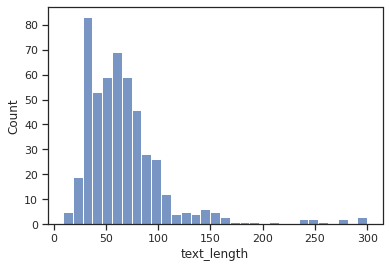

In [ ]:
sns.histplot(data=ts, x = 'text_length')

In [ ]:
ts['text'] = ts['title'].astype(str).str.lower()

In [ ]:
ts['text_token'] = ts['text'].apply(regexp.tokenize)

In [ ]:
ts['text_token'] = ts['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
ts['text_string'] = ts['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>1]))

In [ ]:
all_tesla_words = ' '.join([word for word in ts['text_string']])

In [ ]:
tokenized_tesla_words = nltk.tokenize.word_tokenize(all_tesla_words)

In [ ]:
tesla_fdist = FreqDist(tokenized_tesla_words)
tesla_fdist

FreqDist({'tesla': 271, '2023': 65, 'price': 41, 'tsla': 40, 'stock': 37, 'january': 36, 'china': 35, 'model': 35, 'musk': 30, 'new': 28, ...})

In [ ]:
ts['text_string_fdist'] = ts['text_token'].apply(lambda x: ' '.join([item for item in x if tesla_fdist[item] >= 1]))

In [ ]:
ts['text_string_lem'] = ts['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [ ]:
ts['is_equal'] = (ts['text_string_fdist']== ts['text_string_lem'])

In [ ]:
ts.is_equal.value_counts()

True    500
Name: is_equal, dtype: int64

In [ ]:
all_tesla_words_lem = ' '.join([word for word in ts['text_string_lem']])

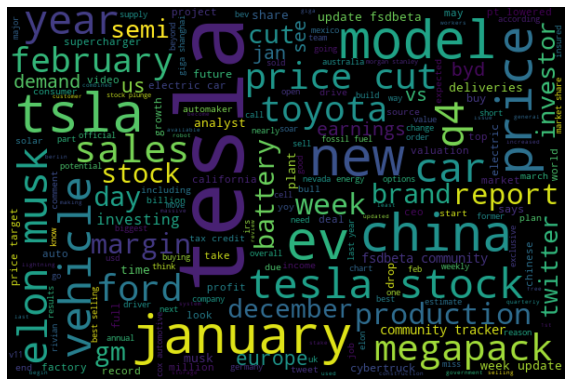

In [ ]:
tesla_wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_tesla_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(tesla_wordcloud, interpolation='bilinear')
plt.axis('off');

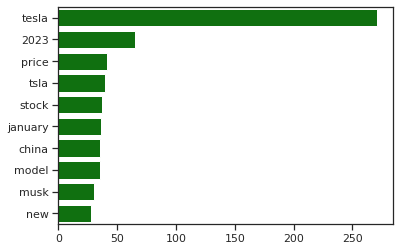

In [ ]:
tesla_words = nltk.word_tokenize(all_tesla_words_lem)
fd = FreqDist(tesla_words)
tesla_top_10 = fd.most_common(10)
tesla_fdist = pd.Series(dict(tesla_top_10))
sns.set_theme(style = "ticks")

sns.barplot(y=tesla_fdist.index, x=tesla_fdist.values, color = 'green')

# Sentiment Analysis

In [ ]:
#using bigrams and trigrams 

## Gamestop

In [ ]:
for x in gs['text_string_lem']:
  analyzer.polarity_scores(text=x)

In [ ]:
gs['polarity'] = gs['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
gs.tail(3)

,title,score,id,subreddit,url,num_comments,body,created,text_length,text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
497,"i want to get a job at gamestop, what would be...",6,zxjjgu,GameStop,https://www.reddit.com/r/GameStop/comments/zxj...,46,I already have a job but I need another to be ...,1.672258e+09,74,"i want to get a job at gamestop, what would be...","[want, get, job, gamestop, would, best, way, go]",want get job gamestop would best way go,want get job gamestop would best way go,want get job gamestop would best way go,True,"{'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'comp..."
498,SL Pay Discussion,14,zxavzc,GameStop,https://www.reddit.com/r/GameStop/comments/zxa...,53,So I have been with the company for about a ye...,1.672238e+09,17,sl pay discussion,"[sl, pay, discussion]",sl pay discussion,sl pay discussion,sl pay discussion,True,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp..."
499,If you have the inability to read and comprehe...,53,zwx6io,GameStop,https://www.reddit.com/r/GameStop/comments/zwx...,60,~~I stg I’m going to pop this kid out early wi...,1.672193e+09,98,if you have the inability to read and comprehe...,"[inability, read, comprehend, gamestop, return...",inability read comprehend gamestop return poli...,inability read comprehend gamestop return poli...,inability read comprehend gamestop return poli...,True,"{'neg': 0.245, 'neu': 0.545, 'pos': 0.209, 'co..."


In [ ]:
# Get Summary Statistics for Text Length 

print(gs['text_length'].mean(), gs['text_length'].median(), gs['text_length'].mode())

print(gs['num_comments'].mean(), gs['num_comments'].median(), gs['num_comments'].mode())

43.566 33.0 0    25
dtype: int64
34.498 25.0 0    12
dtype: int64


In [ ]:
df = pd.concat(
    [gs.drop(['title', 'score', 'url', 'num_comments', 'body', 'is_equal', 'polarity'], axis=1), 
     gs['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,id,subreddit,created,text_length,text,text_token,text_string,text_string_fdist,text_string_lem,neg,neu,pos,compound
0,1107k66,GameStop,1.676178e+09,61,weekly customer question megathread ***read be...,"[weekly, customer, question, read, posting]",weekly customer question read posting,weekly customer question read posting,weekly customer question read posting,0.000,1.000,0.000,0.0000
1,10s8ch7,GameStop,1.675391e+09,46,[mod leak] plans for a better fiscal year 2023,"[mod, leak, plans, better, fiscal, year, 2023]",mod leak plans better fiscal year 2023,mod leak plans better fiscal year 2023,mod leak plans better fiscal year 2023,0.233,0.485,0.282,0.1280
2,1130dk0,GameStop,1.676474e+09,194,are there any managers/employees who actually ...,"[managers, employees, actually, enjoy, working...",managers employees actually enjoy working comp...,managers employees actually enjoy working comp...,managers employees actually enjoy working comp...,0.236,0.637,0.127,-0.4091


In [ ]:
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,id,subreddit,created,text_length,text,text_token,text_string,text_string_fdist,text_string_lem,neg,neu,pos,compound,sentiment
0,1107k66,GameStop,1.676178e+09,61,weekly customer question megathread ***read be...,"[weekly, customer, question, read, posting]",weekly customer question read posting,weekly customer question read posting,weekly customer question read posting,0.000,1.000,0.000,0.0000,neutral
1,10s8ch7,GameStop,1.675391e+09,46,[mod leak] plans for a better fiscal year 2023,"[mod, leak, plans, better, fiscal, year, 2023]",mod leak plans better fiscal year 2023,mod leak plans better fiscal year 2023,mod leak plans better fiscal year 2023,0.233,0.485,0.282,0.1280,positive
2,1130dk0,GameStop,1.676474e+09,194,are there any managers/employees who actually ...,"[managers, employees, actually, enjoy, working...",managers employees actually enjoy working comp...,managers employees actually enjoy working comp...,managers employees actually enjoy working comp...,0.236,0.637,0.127,-0.4091,negative
3,112zwlt,GameStop,1.676473e+09,46,thanks for picking morgan stanley corporate...,"[thanks, picking, morgan, stanley, corporate]",thanks picking morgan stanley corporate,thanks picking morgan stanley corporate,thanks picking morgan stanley corporate,0.000,0.580,0.420,0.4404,positive


In [ ]:
df.loc[df['compound'].idxmax()].values

array(['109gn5h', Subreddit(display_name='GameStop'), 1673472731.0, 195,
       'q4 bonus for sl soooooooo i was being told that the new bonus is significantly larger than the last quarters. anyone that can verify? i’m trying to budget what debt/bills to pay with taxes/bonus.',
       list(['q4', 'bonus', 'sl', 'soooooooo', 'told', 'new', 'bonus', 'significantly', 'larger', 'last', 'quarters', 'anyone', 'verify', 'trying', 'budget', 'debt', 'bills', 'pay', 'taxes', 'bonus']),
       'q4 bonus sl soooooooo told new bonus significantly larger last quarters anyone verify trying budget debt bills pay taxes bonus',
       'q4 bonus sl soooooooo told new bonus significantly larger last quarters anyone verify trying budget debt bills pay taxes bonus',
       'q4 bonus sl soooooooo told new bonus significantly larger last quarters anyone verify trying budget debt bills pay taxes bonus',
       0.133, 0.51, 0.357, 0.8225, 'positive'], dtype=object)

In [ ]:
# Tweet with highest negative sentiment 
# ...seems to be a case of wrong classification because of the word "deficit"
df.loc[df['compound'].idxmin()].values

array(['105dtm7', Subreddit(display_name='GameStop'), 1673060100.0, 130,
       "i already don't feel comfortable selling gs-refurb products because they suck ass but this is a new low. wtf is this warehouse?!?!",
       list(['already', 'feel', 'comfortable', 'selling', 'gs', 'refurb', 'products', 'suck', 'ass', 'new', 'low', 'wtf', 'warehouse']),
       'already feel comfortable selling gs refurb products suck ass new low wtf warehouse',
       'already feel comfortable selling gs refurb products suck ass new low wtf warehouse',
       'already feel comfortable selling gs refurb products suck ass new low wtf warehouse',
       0.521, 0.339, 0.14, -0.8402, 'negative'], dtype=object)

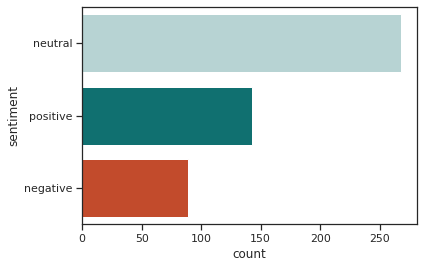

In [ ]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

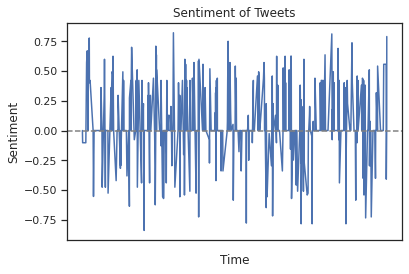

In [ ]:
# Lineplot
g = sns.lineplot(x='created', y='compound', data=df)

g.set(xticklabels=[]) 
g.set(title='Sentiment of Tweets')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

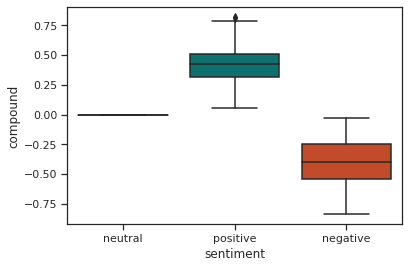

In [ ]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

## Tesla

In [ ]:
for x in ts['text_string_lem']:
  analyzer.polarity_scores(text=x)

In [ ]:
ts['polarity'] = ts['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
ts.tail(3)

,title,score,id,subreddit,url,num_comments,body,created,text_length,text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
497,Model Y achieved the highest overall weighted ...,111,zsrvnh,teslainvestorsclub,https://www.ancap.com.au/safety-ratings/tesla/...,5,,1.671731e+09,130,model y achieved the highest overall weighted ...,"[model, achieved, highest, overall, weighted, ...",model achieved highest overall weighted safety...,model achieved highest overall weighted safety...,model achieved highest overall weighted safety...,True,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'comp..."
498,Tesla files permits for more work at Giga Texas,52,zstyu0,teslainvestorsclub,https://driveteslacanada.ca/news/tesla-files-p...,13,,1.671736e+09,47,tesla files permits for more work at giga texas,"[tesla, files, permits, work, giga, texas]",tesla files permits work giga texas,tesla files permits work giga texas,tesla files permits work giga texas,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
499,S3XY Winter Testing in New Zealand,29,zst32f,teslainvestorsclub,https://youtu.be/w64hH8_POgs,1,,1.671734e+09,34,s3xy winter testing in new zealand,"[s3xy, winter, testing, new, zealand]",s3xy winter testing new zealand,s3xy winter testing new zealand,s3xy winter testing new zealand,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
print(ts['text_length'].mean(), ts['text_length'].median(), ts['text_length'].mode())
print(ts['num_comments'].mean(), ts['num_comments'].median(), ts['num_comments'].mode())

67.704 60.0 0    31
dtype: int64
65.59 28.0 0    6
1    9
dtype: int64


In [ ]:
tesla_df = pd.concat(
    [ts.drop(['title', 'score', 'url', 'num_comments', 'body', 'is_equal', 'polarity'], axis=1), 
     ts['polarity'].apply(pd.Series)], axis=1)
tesla_df.head(3)

,id,subreddit,created,text_length,text,text_token,text_string,text_string_fdist,text_string_lem,neg,neu,pos,compound
0,112sst3,teslainvestorsclub,1.676448e+09,32,"daily thread - february 15, 2023","[february, 15, 2023]",february 15 2023,february 15 2023,february 15 2023,0.0,1.0,0.0,0.0
1,t0qeyu,teslainvestorsclub,1.645750e+09,43,long-running thread for detailed discussion,"[long, running, detailed, discussion]",long running detailed discussion,long running detailed discussion,long running detailed discussion,0.0,1.0,0.0,0.0
2,112wm7u,teslainvestorsclub,1.676463e+09,68,tesla to open some superchargers to other vehi...,"[tesla, open, superchargers, vehicles, white, ...",tesla open superchargers vehicles white house ...,tesla open superchargers vehicles white house ...,tesla open superchargers vehicles white house ...,0.0,1.0,0.0,0.0


In [ ]:
tesla_df['sentiment'] = tesla_df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
tesla_df.head(4)

,id,subreddit,created,text_length,text,text_token,text_string,text_string_fdist,text_string_lem,neg,neu,pos,compound,sentiment
0,112sst3,teslainvestorsclub,1.676448e+09,32,"daily thread - february 15, 2023","[february, 15, 2023]",february 15 2023,february 15 2023,february 15 2023,0.0,1.000,0.000,0.000,neutral
1,t0qeyu,teslainvestorsclub,1.645750e+09,43,long-running thread for detailed discussion,"[long, running, detailed, discussion]",long running detailed discussion,long running detailed discussion,long running detailed discussion,0.0,1.000,0.000,0.000,neutral
2,112wm7u,teslainvestorsclub,1.676463e+09,68,tesla to open some superchargers to other vehi...,"[tesla, open, superchargers, vehicles, white, ...",tesla open superchargers vehicles white house ...,tesla open superchargers vehicles white house ...,tesla open superchargers vehicles white house ...,0.0,1.000,0.000,0.000,neutral
3,112xp5h,teslainvestorsclub,1.676467e+09,56,elon musk donates almost $2bn of tesla shares ...,"[elon, musk, donates, almost, 2bn, tesla, shar...",elon musk donates almost 2bn tesla shares charity,elon musk donates almost 2bn tesla shares charity,elon musk donates almost 2bn tesla shares charity,0.0,0.559,0.441,0.577,positive


In [ ]:
tesla_df.loc[tesla_df['compound'].idxmax()].values

array(['zwnin2', Subreddit(display_name='teslainvestorsclub'),
       1672168683.0, 259,
       'tesla model y has achieved a good score of g+ (good+) in the china automobile research ivista intelligent vehicle index - navigation intelligent driving np evaluation! autopilot improvements still need to be made! better yet bring out fsd beta in china. $tsla',
       list(['tesla', 'model', 'achieved', 'good', 'score', 'g', 'good', 'china', 'automobile', 'research', 'ivista', 'intelligent', 'vehicle', 'index', 'navigation', 'intelligent', 'driving', 'np', 'evaluation', 'autopilot', 'improvements', 'still', 'need', 'made', 'better', 'yet', 'bring', 'fsd', 'beta', 'china', 'tsla']),
       'tesla model achieved good score good china automobile research ivista intelligent vehicle index navigation intelligent driving np evaluation autopilot improvements still need made better yet bring fsd beta china tsla',
       'tesla model achieved good score good china automobile research ivista intellige

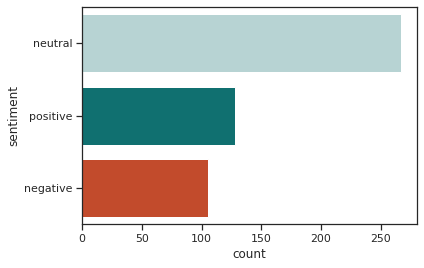

In [ ]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=tesla_df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

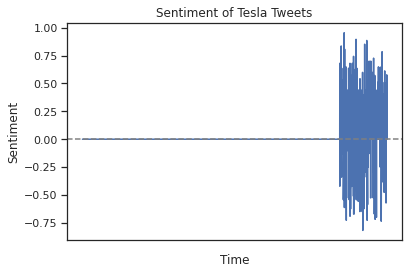

In [ ]:
# Lineplot
g = sns.lineplot(x='created', y='compound', data=tesla_df)

g.set(xticklabels=[]) 
g.set(title='Sentiment of Tesla Tweets')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

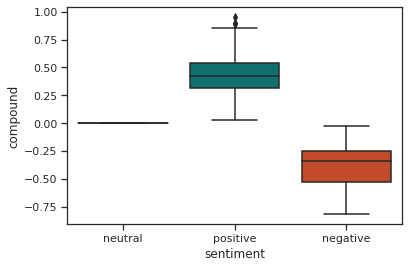

In [ ]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=tesla_df);

# Data Preprocessing

In [ ]:
# final tesla data tesla_df.head()
#final gamestop data fram df as of now 
#combining evertying
#tesla_df['id'] = 1
#df ['id'] = 0

In [ ]:
#combine two data sets together
frames = [tesla_df, df]
final_df = pd.concat(frames)

In [ ]:
final_df.head()

,id,subreddit,created,text_length,text,text_token,text_string,text_string_fdist,text_string_lem,neg,neu,pos,compound,sentiment
0,112sst3,teslainvestorsclub,1.676448e+09,32,"daily thread - february 15, 2023","[february, 15, 2023]",february 15 2023,february 15 2023,february 15 2023,0.0,1.000,0.000,0.000,neutral
1,t0qeyu,teslainvestorsclub,1.645750e+09,43,long-running thread for detailed discussion,"[long, running, detailed, discussion]",long running detailed discussion,long running detailed discussion,long running detailed discussion,0.0,1.000,0.000,0.000,neutral
2,112wm7u,teslainvestorsclub,1.676463e+09,68,tesla to open some superchargers to other vehi...,"[tesla, open, superchargers, vehicles, white, ...",tesla open superchargers vehicles white house ...,tesla open superchargers vehicles white house ...,tesla open superchargers vehicles white house ...,0.0,1.000,0.000,0.000,neutral
3,112xp5h,teslainvestorsclub,1.676467e+09,56,elon musk donates almost $2bn of tesla shares ...,"[elon, musk, donates, almost, 2bn, tesla, shar...",elon musk donates almost 2bn tesla shares charity,elon musk donates almost 2bn tesla shares charity,elon musk donates almost 2bn tesla shares charity,0.0,0.559,0.441,0.577,positive
4,112wzf8,teslainvestorsclub,1.676464e+09,48,tesla to halt some china production for upgrades,"[tesla, halt, china, production, upgrades]",tesla halt china production upgrades,tesla halt china production upgrades,tesla halt china production upgrades,0.0,1.000,0.000,0.000,neutral


In [ ]:
# set labels

final_df['labels'] = np.where(final_df['subreddit'] == 'teslainvestorsclub', 1, 0)
final_df['text'] = final_df['text_string_lem']

# BERT

In [ ]:
!pip install transformers
!pip install transformers[torch]
!pip install datasets
!pip install -q tf-models-official
!pip install -q -U "tensorflow-text==2.9.*"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 42.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.11.3 requires tensorflow~=2.11.0, but you have tensorflow 2.9.3 which is incompatible.
tf-models-official 2.11.3 requires tensorflow-text~=2.11.0, but you have tensorflow-text 2.9.0 which

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F
#from torchmetrics.functional import f1_score, precision_recall
from tqdm import tqdm
from tqdm.auto import tqdm
import transformers

In [ ]:
#final_df_1 = final_df.loc[:,['id','text_string_lem']]

In [ ]:
# set labels

final_df['labels'] = np.where(final_df['subreddit'] == 'teslainvestorsclub', 1, 0)
final_df['text'] = final_df['text_string_lem']

In [ ]:
final = final_df[['labels', 'text']]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(final_df['text'], final_df['labels'], test_size=0.2, random_state=42)

In [ ]:
class BertDataset(Dataset):
    def __init__(self, tokenizer, max_length, data_frame):
        super(BertDataset, self).__init__()
        # self.root_dir=root_dir
        self.data_frame=data_frame
        self.tokenizer=tokenizer
        # self.target=self.data_frame.iloc[:,4] #url_content
        # self.target=self.data_frame.iloc[:,5] #binary
        # self.target=self.data_frame.iloc[:,7] #multiclass
        self.target=self.data_frame.iloc[:,0] #multiclass bert lbls
        self.max_length=max_length
    
    def __len__(self):
        return len(self.data_frame)
    
    def __getitem__(self, index):
        # text1 = self.data_frame.iloc[index,7]
        text1 = self.data_frame.iloc[index,1]
        
        inputs = self.tokenizer.encode_plus(
            text1,
            None,
            pad_to_max_length=True,
            add_special_tokens=True,
            return_attention_mask=True,
            max_length=self.max_length,
        )
        
        ids = inputs["input_ids"]
        token_type_ids = inputs["token_type_ids"]
        mask = inputs["attention_mask"]
        
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            # 'target': torch.tensor(self.data_frame.iloc[index,5], dtype=torch.long), #binary
            # 'target': torch.tensor(self.data_frame.iloc[index,7], dtype=torch.long), #multiclass
            'target': torch.tensor(self.data_frame.iloc[index,0], dtype=torch.long), #multiclass bert lbls
        }

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#final_df_1.head()

In [ ]:
train, val = train_test_split(final, train_size = .8)
test = train_test_split(train, test_size = .2)

In [ ]:
train.head()

,labels,text
358,1,model round steering wheel
494,1,live elon musk twitter space talking stock
159,1,tesla stock surges earnings upcoming vehicles ...
37,0,two days opened morning associates pulled fast...
263,1,ford cut dependence vw next generation electri...


In [ ]:
#cv = CountVectorizer()
#cv.fit(final_df['text_string_lem'])
#train = cv.transform(train)
#test = cv.transform(test)


In [ ]:
train_data = BertDataset(tokenizer, max_length=512, data_frame=train)
train_loader=DataLoader(dataset=train_data,batch_size=2,shuffle=True)

valid_data = BertDataset(tokenizer, max_length=512, data_frame=val)
valid_loader=DataLoader(dataset=valid_data,batch_size=2,shuffle=True)

In [ ]:
train_loader

In [ ]:
train_loader

In [ ]:
class BERT(nn.Module):
    def __init__(self):
        super(BERT, self).__init__()
        self.bert_model = transformers.BertModel.from_pretrained("bert-base-uncased")
        self.out = nn.Linear(768, 1)# only for 1 class??
        #self.out = nn.Linear(8, 1)
    
    def forward(self, ids, mask, token_type_ids):
        _,o2 = self.bert_model(ids,attention_mask=mask,token_type_ids=token_type_ids, return_dict=False)
        
        out = self.out(o2)
        
        return out

In [ ]:
model = BERT()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
model.to(device)

BERT(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
 

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

In [ ]:
from transformers import AdamW
optimizer = AdamW(model.parameters(), lr=5e-5)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
train_loader

In [ ]:
model.to(device)
epochs = 4
# epochs = 10

train_losses = []
train_accuracies = []
train_f1_scores = []
train_prec_recall = []

valid_losses = []
valid_accuracies = []
valid_f1_scores = []
valid_prec_recall = []

for epoch in range(1, epochs+1):
    epoch_loss = []
    print(epoch)
    training_loop = tqdm(enumerate(train_loader),leave=False,total=len(train_loader))
    for batch, dl in training_loop:
        model.train()
        ids=dl['ids'].to(device)
        token_type_ids=dl['token_type_ids'].to(device)
        mask=dl['mask'].to(device)
        label=dl['target'].to(device)
        label = label.unsqueeze(1).to(device)
        #print(f"1. label shape: {label.shape} pred shape: {output.shape}")
        
        optimizer.zero_grad()
        
        
        output=model(
            ids=ids,
            mask=mask,
            token_type_ids=token_type_ids
        )
        print(output)
        label = label.type_as(output)
        print(label)
        print(f"2. label shape: {label.shape} pred shape: {output.shape}")

        label = label.to(torch.int64)

        loss = loss_fn(output,label.float())
        loss.backward()
        # epoch_loss.append(loss.item())
        
        optimizer.step()
        
        pred = torch.where(output >= 0, 1, 0)
        # train_pr = precision_recall(pred, label.int(), num_classes=3)
        # train_score = f1_score(pred, label.int(), num_classes=3)
        print(label.shape, pred.shape)
        num_correct = sum(1 for a, b in zip(pred, label) if a[0] == b[0])
        num_samples = pred.shape[0]
        
        accuracy = num_correct/num_samples
        
        
        # print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}')
        
        
        train_accuracies.append(accuracy)
        train_losses.append(loss.item())
        # train_prec_recall.append(train_pr)
        # train_f1_scores.append(train_score)

        # Show progress while training
        training_loop.set_description(f'Training epoch={epoch}/{epochs}')
        training_loop.set_postfix(loss=loss.item(),acc=accuracy)
    valid_loop = tqdm(enumerate(valid_loader),leave=False,total=len(valid_loader))
    if epoch % 1 == 0:
        for batch, dl in valid_loop:
            valid_loss = 0
            model.eval()
            ids=dl['ids'].to(device)
            token_type_ids=dl['token_type_ids'].to(device)
            mask=dl['mask'].to(device)

            label=dl['target'].to(device)
            label = label.unsqueeze(1).to(device)

            output=model(
                ids=ids,
                mask=mask,
                token_type_ids=token_type_ids
            )
            # print(f"1. label shape: {label.shape} pred shape: {output.shape}")

            label = label.type_as(output)

            # print(f"2. label shape: {label.shape} pred shape: {output.shape}")

            loss = loss_fn(output,label.float())

            
            valid_loss += loss.item()

            pred = torch.where(output >= 0, 1, 0)
            print(label.shape, pred.shape)
            # valid_pr = precision_recall(pred, label.int(), num_classes=3)
            # valid_score = f1_score(pred, label.int(), num_classes=3)
            
            num_correct = sum(1 for a, b in zip(pred, label) if a[0] == b[0])
            num_samples = pred.shape[0]
            
            accuracy = num_correct/num_samples
            
            # print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}')

            valid_accuracies.append(accuracy)
            # valid_f1_scores.append(valid_score)
            valid_losses.append(loss.item())
            # valid_prec_recall.append(valid_pr)

            # Show progress validation
            valid_loop.set_description(f'Valid Epoch={epoch}/{epochs}')
            valid_loop.set_postfix(loss=loss.item(),acc=accuracy)



1


  0%|          | 0/400 [00:00<?, ?it/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


tensor([[-0.4769],
        [-0.3165]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.],
        [1.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[-0.4509],
        [-0.6482]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[1.],
        [0.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[-0.5824],
        [-0.1635]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.],
        [1.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[ 0.3226],
        [-0.2692]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[1.],
        [0.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[-0.1505],
        [ 0.5748]], device='cuda:0', grad_fn=<AddmmBa

  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([

  0%|          | 0/400 [00:00<?, ?it/s]

tensor([[-4.3247],
        [ 5.3460]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.],
        [1.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[-4.0879],
        [-4.3696]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.],
        [0.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[-0.9625],
        [-4.1369]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[1.],
        [0.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[ 2.0413],
        [-3.4640]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[1.],
        [0.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[-4.3668],
        [ 5.1603]], device='cuda:0', grad_fn=<AddmmBa

  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([

  0%|          | 0/400 [00:00<?, ?it/s]

tensor([[-2.3924],
        [ 2.4436]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.],
        [1.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[-2.8324],
        [ 0.8226]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.],
        [1.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[-2.7231],
        [-3.0361]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.],
        [0.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[2.6695],
        [1.3465]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[1.],
        [1.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[2.8795],
        [2.6020]], device='cuda:0', grad_fn=<AddmmBackwa

  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([

  0%|          | 0/400 [00:00<?, ?it/s]

tensor([[-5.6217],
        [ 5.3924]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.],
        [1.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[-5.6461],
        [ 4.0831]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.],
        [1.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[ 4.7860],
        [-5.4746]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[1.],
        [0.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[-5.3625],
        [-5.5106]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.],
        [0.]], device='cuda:0')
2. label shape: torch.Size([2, 1]) pred shape: torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
tensor([[-5.5940],
        [-5.7111]], device='cuda:0', grad_fn=<AddmmBa

  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([2, 1]) torch.Size([2, 1])
torch.Size([

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/weights_1.pt")

In [ ]:
#model = TheModelClass(*args, **kwargs)
#model.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/weights_1.pt"))
#model.eval()

In [ ]:
print(accuracy)
#print(len(num_correct))

1.0


<ipython-input-244-8000316fbb74>:19: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plt.xlim([0, len(train_precision)])


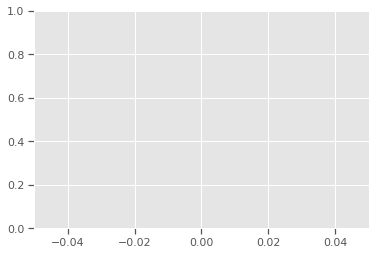

nan nan
nan nan


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# Set style
plt.style.use('ggplot')

# Retrieve precision/recall values from tensor 
train_precision = [float(i[0]) for i in train_prec_recall]
train_recall = [float(i[1]) for i in train_prec_recall]

valid_precision = [float(i[0]) for i in valid_prec_recall]
valid_recall = [float(i[1]) for i in valid_prec_recall]

# Plot precision/recall
plt.plot(train_precision)
plt.plot(valid_precision)

plt.plot(train_recall)
plt.plot(valid_recall)

# Set bounds for plot
plt.xlim([0, len(train_precision)])
plt.ylim([0, 1])
plt.show()

# # Calculate mean and median
print(np.median(train_precision), np.mean(train_precision))
#print(np.median(train_recall), np.mean(train_recall))
print(np.median(valid_precision), np.mean(valid_precision))
#print(np.median(valid_recall), np.mean(valid_recall))

<ipython-input-245-aaff4340001a>:18: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plt.xlim([0, len(training_f1_scores)])


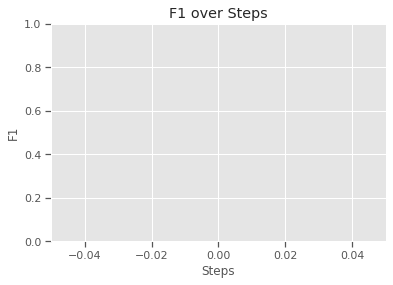

Median Train F1 Score: nan.
Average Train F1 Score: nan
Median Valid F1 Score: nan. 
Average Valid F1 Score:  nan


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# Set style
plt.style.use('ggplot')

# Retrieve F1 scores from tensor 
training_f1_scores = [float(i) for i in train_f1_scores]
valid_f1_scores = [float(i) for i in valid_f1_scores]

# Prepare plot
plt.title("F1 over Steps")
plt.xlabel("Steps")
plt.ylabel("F1")

# Plot F1_scores
plt.plot(training_f1_scores)
plt.plot(valid_f1_scores)

# Set bounds for plot
plt.xlim([0, len(training_f1_scores)])
plt.ylim([0, 1])
plt.show()

# Calculate mean and median
print(f"Median Train F1 Score: {np.median(training_f1_scores)}.\nAverage Train F1 Score: {np.mean(training_f1_scores)}")
print(f"Median Valid F1 Score: {np.median(valid_f1_scores)}. \nAverage Valid F1 Score:  {np.mean(valid_f1_scores)}")

# XGBoost

## What is XGBoost?

XGBoost (Extreme Gradient Boosting) is an efficient parallel tree boosting machine learning method that allows for fast and accurate modeling. It is distributed and highly scalable.

XGBoost Advantages:
- more direct route to minimum error
- converges in fewer steps
- lower compute
- simplified calculations [link](https://c3.ai/glossary/data-science/xgboost/#:~:text=XGBoost%20offers%20a%20few%20technical,speed%20and%20lower%20compute%20costs.)

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
final_df.head()

,id,subreddit,created,text_length,text,text_token,text_string,text_string_fdist,text_string_lem,neg,neu,pos,compound,sentiment,labels
0,112sst3,teslainvestorsclub,1.676448e+09,32,february 15 2023,"[february, 15, 2023]",february 15 2023,february 15 2023,february 15 2023,0.0,1.000,0.000,0.000,neutral,1
1,t0qeyu,teslainvestorsclub,1.645750e+09,43,long running detailed discussion,"[long, running, detailed, discussion]",long running detailed discussion,long running detailed discussion,long running detailed discussion,0.0,1.000,0.000,0.000,neutral,1
2,112wm7u,teslainvestorsclub,1.676463e+09,68,tesla open superchargers vehicles white house ...,"[tesla, open, superchargers, vehicles, white, ...",tesla open superchargers vehicles white house ...,tesla open superchargers vehicles white house ...,tesla open superchargers vehicles white house ...,0.0,1.000,0.000,0.000,neutral,1
3,112xp5h,teslainvestorsclub,1.676467e+09,56,elon musk donates almost 2bn tesla shares charity,"[elon, musk, donates, almost, 2bn, tesla, shar...",elon musk donates almost 2bn tesla shares charity,elon musk donates almost 2bn tesla shares charity,elon musk donates almost 2bn tesla shares charity,0.0,0.559,0.441,0.577,positive,1
4,112wzf8,teslainvestorsclub,1.676464e+09,48,tesla halt china production upgrades,"[tesla, halt, china, production, upgrades]",tesla halt china production upgrades,tesla halt china production upgrades,tesla halt china production upgrades,0.0,1.000,0.000,0.000,neutral,1


In [ ]:
# set labels

final_df['labels'] = np.where(final_df['subreddit'] == 'teslainvestorsclub', 1, 0)
final_df['text'] = final_df['text_string_lem']

In [ ]:
final_df.head()

,id,subreddit,created,text_length,text,text_token,text_string,text_string_fdist,text_string_lem,neg,neu,pos,compound,sentiment,labels
0,112sst3,teslainvestorsclub,1.676448e+09,32,february 15 2023,"[february, 15, 2023]",february 15 2023,february 15 2023,february 15 2023,0.0,1.000,0.000,0.000,neutral,1
1,t0qeyu,teslainvestorsclub,1.645750e+09,43,long running detailed discussion,"[long, running, detailed, discussion]",long running detailed discussion,long running detailed discussion,long running detailed discussion,0.0,1.000,0.000,0.000,neutral,1
2,112wm7u,teslainvestorsclub,1.676463e+09,68,tesla open superchargers vehicles white house ...,"[tesla, open, superchargers, vehicles, white, ...",tesla open superchargers vehicles white house ...,tesla open superchargers vehicles white house ...,tesla open superchargers vehicles white house ...,0.0,1.000,0.000,0.000,neutral,1
3,112xp5h,teslainvestorsclub,1.676467e+09,56,elon musk donates almost 2bn tesla shares charity,"[elon, musk, donates, almost, 2bn, tesla, shar...",elon musk donates almost 2bn tesla shares charity,elon musk donates almost 2bn tesla shares charity,elon musk donates almost 2bn tesla shares charity,0.0,0.559,0.441,0.577,positive,1
4,112wzf8,teslainvestorsclub,1.676464e+09,48,tesla halt china production upgrades,"[tesla, halt, china, production, upgrades]",tesla halt china production upgrades,tesla halt china production upgrades,tesla halt china production upgrades,0.0,1.000,0.000,0.000,neutral,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_df['text'], final_df['labels'], test_size=0.2, random_state=42)

In [ ]:
# importing the relevant modules
from sklearn.feature_extraction.text import CountVectorizer
# vectorizing the sentences

cv = CountVectorizer(binary = True) # implies that it indicates whether the word is present or not.
cv.fit(final_df['text']) # find all the unique words from the training set
train_x = cv.transform(X_train)
test_x = cv.transform(X_test)

In [ ]:
xgb_train = xgb.DMatrix(train_x, y_train)
xgb_test = xgb.DMatrix(test_x, y_test)

In [ ]:
# Setting the Parameters of the Model
param = {'eta': 0.75,
         'max_depth': 50,
         'objective': 'binary:logitraw'}
# Training the Model
xgb_model = xgb.train(param, xgb_train, num_boost_round = 30)
# Predicting using the Model
y_pred = xgb_model.predict(xgb_test)
y_pred = np.where(np.array(y_pred) > 0.5, 1, 0) # converting them to 1/0’s
# Evaluation of Model
tesla_acc = accuracy_score(y_test, y_pred)
tesla_f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {tesla_f1}, Accuracy: {tesla_acc}")

F1 Score: 0.9120879120879122, Accuracy: 0.92


In [ ]:
# Code to run inference 
# Time the entire process

# ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_df['text'], final_df['labels'], test_size=0.2, random_state=42)

In [ ]:
# importing the relevant modules
from sklearn.feature_extraction.text import CountVectorizer
# vectorizing the sentences

cv = CountVectorizer(binary = True) # implies that it indicates whether the word is present or not.
cv.fit(final_df['text']) # find all the unique words from the training set
train_x = cv.transform(X_train)
test_x = cv.transform(X_test)

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [ ]:
model = abc.fit(train_x, test_x)

ValueError: ignored

# K Nearest Neighbors 

In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# set labels
# set labels

final_df['labels'] = np.where(final_df['subreddit'] == 'teslainvestorsclub', 1, 0)
final_df['text'] = final_df['text_string_lem']

In [ ]:
np.unique(final_df['labels'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_df['text'], final_df['labels'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer(ngram_range=(1,2))
train_bow=count_vect.fit_transform(X_train.values)
#crossvalidation_bow=count_vect.transform(crossvalidation_data['CleanedText'].values)
test_bow=count_vect.transform(X_test.values)
#getting feature names, this will act as header for BOW data and  will help to recognize important features
feature_names_bow=count_vect.get_feature_names()

In [ ]:
model = KNeighborsClassifier(n_neighbors = 2)

In [ ]:
model.fit(train_bow,y_train)

In [ ]:
model.predict(test_bow)

In [ ]:
# Predicting using the Model
y_pred = model.predict(test_bow)
y_pred = np.where(np.array(y_pred) > 0.5, 1, 0) # converting them to 1/0’s
# Evaluation of Model
tesla_acc = accuracy_score(y_test, y_pred)
tesla_f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {tesla_f1}, Accuracy: {tesla_acc}")

#Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_df['text'], final_df['labels'], test_size=0.2, random_state=20)

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
x_train_tfidf = tfidf.fit_transform(X_train)
x_test_tfidf = tfidf.transform(X_test)

In [ ]:
x_train_tfidf.shape

In [ ]:
x_test_tfidf.shape

In [ ]:
y_train

In [ ]:
np.unique(y_train)

In [ ]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train_tfidf, y_train)

In [ ]:
y_test.head()

In [ ]:
x_test_tfidf

In [ ]:
sgd_clf.predict(x_test_tfidf)

In [ ]:
y_pred = sgd_clf.predict(x_test_tfidf)
y_pred = np.where(np.array(y_pred) > 0.5, 1, 0) # converting them to 1/0’s
# Evaluation of Model
tesla_acc = accuracy_score(y_test, y_pred)
tesla_f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {tesla_f1}, Accuracy: {tesla_acc}")